<a href="https://colab.research.google.com/github/vvrebellion/20191204_VITTORIA_ML/blob/main/Copy_of_01_matmul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matrix multiplication from foundations

The *foundations* we'll assume throughout this course are:

- Python
- Python modules (non-DL)
- pytorch indexable tensor, and tensor creation (including RNGs - random number generators)
- fastai.datasets

## Start a notebook:

For every notebook, we have to set up the google drive and connect the files from the correct directory, otherwise it will not work!


*   mount google drive
*   go to particular folder where code is located



In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
%cd 


/root


In [3]:
 %cd /content/drive/MyDrive/fastai-v3/course-v3/nbs/dl2

/content/drive/MyDrive/fastai-v3/course-v3/nbs/dl2


##Check Imports:

[Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=1850)

In [7]:
%load_ext autoreload 
#will auto reload external references or files
%autoreload 2 
#and will do so on a specific interval

%matplotlib inline 
#will plot in the notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


When we code, there are always mistakes, so we have to debug.

On this course, we will learn to make tests. Tests help to see bugs easily and they also make it easier to modify the code later.

One easy way to do this is to check variables and assigned values.


Explenation of next cell: 

*   comment #export tells the system a cell that you want to keep and reuse.
*   We can then import the exported module using: from exp.nb_00 import *  we should be able to import the variable TEST
*   Create a test framework
test and test_eq using assert



In [8]:
#export
from exp.nb_00 import *
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

* Q: what is assert? what does it do?
* A: The assert keyword is used when debugging code.

The assert keyword lets you test if a condition in your code returns True, if not, the program will raise an AssertionError.

##expanded test cell:

In [ ]:
from exp.nb_lesson8 import *
import operator


def test(a, b, cmp, cname=None):
    """
    Simple test function
    """
    # if no name is passed, 
    if cname is None: 
        cname=cmp.__name__

    # this is the test
    # if it fails, the second phrase will be returned
    # which is the f"{cname}:\n{a}\n{b}"
    assert cmp(a, b), f"{cname}:\n{a}\n{b}"

def test_eq(a,b):
    """
    Is a larger function that calls the test function
    but only passes teh == sign
    """
    test(a, b, operator.eq, '==')

## Run a sample test:

In [9]:
test_eq(TEST,'test') 
#If correct, you won’t get any feedback

In [10]:
#print variable TEST
TEST

'test'

In [11]:
test_eq(TEST, "nottest") 
#If it was wrong, we get a message as follows

AssertionError: ignored

Explenation of following cell:

*   Use run_notebook.py to run the tests outside of the jupyter notebook
*   python run_notebook.py 01_matmul.ipynb run the tests outside of the jupyter notebook

* Prerequistes: pip install fire
* fire takes any function and turns it into a command line interface, this manages arguments and other input values


We can see the assertion error when running in the terminal

Now we have an automatable unit test framework on jupyter notebook

In [13]:
# To run tests in console:
#! pip install fire
#! python run_notebook.py 01_matmul.ipynb

## ERROR Get data:

[Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=2159)

In [ ]:
#export

# standard libraries
from pathlib import Path
from IPython.core.debugger import set_trace

import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt

#  datasets
from fastai import datasets

#  basic pytorch
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [16]:
#path = datasets.download_data(MNIST_URL, ext='.gz'); path

In [ ]:
#with gzip.open(path, 'rb') as f:
 #   ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [ ]:
#x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
#n,c = x_train.shape
#x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

##Correct "get data":

In [17]:
#export

# standard libraries
from pathlib import Path
from IPython.core.debugger import set_trace

import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt

#  datasets
from fastai import datasets

#  basic pytorch
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [14]:
def get_data():

    #import dataset
    import os
    import torchvision.datasets as datasets

    #store in data folder
    root = '../data'
    if not os.path.exists(root):
        os.mkdir(root)

    #create train data set and test dataset:

    #train dataset will be downloaded and used for training     
    train_set = datasets.MNIST(root=root, train=True, download=True)
    
    #test dataset will be downloaded BUT NOT used for training
    test_set = datasets.MNIST(root=root, train=False, download=True)

    #split train dataset into validation dataset and train dataset 
    #the size of train dataset is 50000
    #the size of validation dataset is 50000
    x_train, x_valid = train_set.data.split([50000, 10000])
    y_train, y_valid = train_set.targets.split([50000, 10000])
    return (x_train.view(50000, -1) / 256.0), y_train.float(), (x_valid.view(10000, -1))/ 256.0, y_valid.float()

x_train,y_train,x_valid,y_valid = get_data()



In [15]:
# store the number of 
# n = rows
# c = columns

n,c = x_train.shape

# take a look at the values and the shapes
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()
#our data:
#x_train is a table with 500000 rows

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5., 0., 4.,  ..., 8., 4., 8.]),
 torch.Size([50000]),
 tensor(0.),
 tensor(9.))

## Let's take a look at our data:

In [18]:
import numpy
numpy.sqrt(c)
#the image is 28 by 28
#this is a matrix, but in ml a vector 

28.0

In [19]:
len (x_train), len (y_train), x_train[1], y_train[1] 
#input, x, binary image in matrix repesentation
#output, y, label: digit from 0 to 9
#first element of xtrain
#the elements in this matrix represent a picture, eg. 0 represents black color

(50000,
 50000,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0

In [20]:
x_valid, x_valid.shape, y_valid, y_valid.shape, y_valid.min(), y_valid.max()


(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([10000, 784]),
 tensor([3., 8., 6.,  ..., 5., 6., 8.]),
 torch.Size([10000]),
 tensor(0.),
 tensor(9.))

In [21]:
n, y_train.shape[0]

(50000, 50000)

#Lets test our input data:

1. row check: check that the number of rows in x_train is teh same shape as y_train and that number should be 50,000
2. column check: check that number of columns is 28*28 because that is the total number of pixels of the unrolled images
3. classes check: test that there are 10 different classes found in y_train: 0 - 9


In [22]:
assert n==y_train.shape[0]==50000
test_eq(c,28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In case we made some mistakes when we imported the dataset this should cause an error which will tell us that there is something wrong and we should fix it before moving on.


In [23]:
mpl.rcParams['image.cmap'] = 'gray'
#matplotlib mpl will use gray scale 
#since we are going to be working with MNIST

In [24]:
img = x_train[0]

In [25]:
img.view(28,28).type()

'torch.FloatTensor'

In [26]:
img

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

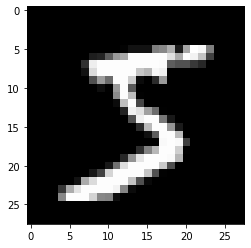

In [27]:
plt.imshow(img.view((28,28)));
# note that there is a single vector 
#that is reshaped into the square format

## Initial python model

 [Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=2342)

 [Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=2342)

Linear model: y = ax + b

a = weights

b = bias/baseline

In [28]:
weights = torch.randn(784,10); weights
#Weights receives random values 784 in and 10 out
#784 is the size of image, 28x28
#10 is the number of outputs, digits 0 to 9

tensor([[ 1.5705,  1.3106,  1.2236,  ...,  1.1236, -0.1651,  0.1648],
        [-0.6423, -0.3147, -2.2214,  ..., -0.3883,  1.3296, -1.6539],
        [ 1.1899,  0.8837,  1.3122,  ..., -0.9088, -0.7031, -0.3882],
        ...,
        [ 0.3033,  0.8659,  0.3883,  ..., -0.0247, -0.2455,  0.4175],
        [-0.0302, -0.9895,  0.0950,  ...,  1.3713,  1.2330, -0.2486],
        [-0.1475, -1.2076,  0.1044,  ..., -0.2375, -0.5408,  0.1602]])

In [29]:
bias = torch.zeros(10)
#Bias initialized with zeros

#### Matrix multiplication

Function of matrix multiplication

review of matrix multiplication from [matrixmultiplication.xyz](https://)

The following function multiplies two arrays element by element

A few loops going on: three

In [30]:
def matmul(a,b):

    # gets the shapes of the input arrays
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape

    # checks to make sure that the
    # inner dimensions are the same
    assert ac==br

    # initializes the new 
    #c receives zeros with shape ar and br
    c = torch.zeros(ar, bc)

    # loops by row in A
    for i in range(ar):

        # loops by col in B
        for j in range(bc):

            # for each value
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

Queick sample:

In [31]:
#Will use the first 5 images from the validation data 
#and multiply them by the weights of the matrix

m1 = x_valid[:5]
m2 = weights

In [32]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [33]:
%time t1=matmul(m1, m2)

CPU times: user 785 ms, sys: 0 ns, total: 785 ms
Wall time: 787 ms


This method is correct but very slow

In [34]:
t1.shape

torch.Size([5, 10])

In [35]:
len(x_train)

50000

How can we do this 50,000 times faster? 


We can do this with element-wise operations. We will use pytorch’s tensor to illustrate this. When using pytorch objects, Operators (+,-,*,/,>,<,==) are usually element-wise. Examples of element-wise operations:

#### Elementwise ops

Operators (+,-,\*,/,>,<,==) are usually element-wise.

Examples of element-wise operations:

 [Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=2682)

What is a tensor? ML jargon for matrix and vector

In [ ]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In ordinary programming, you should use loops to add vectors. But if you do it element wise you don't need it, so it's faster

In ML, the computation happens in parallel. That's why it's fast. But in order to use this, we need to use GPU.

In [ ]:
a + b

tensor([12., 14.,  3.])

In [ ]:
(a < b),(a < b).float(),(a < b).float().mean()

(tensor([False,  True,  True]), tensor([0., 1., 1.]), tensor(0.6667))

In [ ]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

*Hint*: you don't normally need to write equations in LaTeX yourself, instead, you can click 'edit' in Wikipedia and copy the LaTeX from there (which is what I did for the above equation). Or on arxiv.org, click "Download: Other formats" in the top right, then "Download source"; rename the downloaded file to end in `.tgz` if it doesn't already, and you should find the source there, including the equations to copy and paste.

What is the magnitute of a matrix? What's the point of it?

Very often the matrix represents some complicated quantitude, so we may need the magnitude.

How do we calculate the magnitude? Frobenius norm

flatten vector and calculate it

In [ ]:
mr,mc = m.shape;mr,mc

(3, 3)

In [ ]:
(m*m)

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

In [ ]:
(m*m).sum()

tensor(285.)

In [ ]:
(m*m).sum().sqrt()

tensor(16.8819)

#### Elementwise matmul

In [ ]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
m[:,0]

tensor([1., 4., 7.])

In [ ]:
m[0,:]

tensor([1., 2., 3.])

###If we adjust the matmul...


In [ ]:
for k in range(ac): # or br
    c[i,j] += a[i,k] * b[k,j]
#will be replaced by

c[i,j] = (a[i,:] * b[:,j]).sum()

This is the same thing as previously but now we calculate the whole row/column at a time. This is 178 times faster.

In [36]:
def matmul(a,b):

    # gets the shapes of the input arrays
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape

    # checks to make sure that the
    # inner dimensions are the same
    assert ac==br

    # initializes the new array
    c = torch.zeros(ar, bc)

    # loops by row in A
    for i in range(ar):

        # loops by col in B
        for j in range(bc):
          
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [37]:
%timeit -n 10 _=matmul(m1, m2)

10 loops, best of 5: 1.04 ms per loop


In [38]:
804/5

160.8

Q: What is this near test?

A: Another function to compare matrices. 

The reason for this test is that due to rounding errors from math operations, matrices may not be exactly the same. As a result, we want a function that will “is a equal to b within some tolerance”

In [39]:
#export
def near(a,b): 
    return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): 
    test(a,b,near)

In [40]:
test_near(t1,matmul(m1, m2))

### Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.  The term broadcasting was first used by Numpy.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

[Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=3110)

#### Broadcasting with a scalar

In [ ]:
a

tensor([10.,  6., -4.])

In [ ]:
a> tensor([0,0,0])

tensor([ True,  True, False])

In [ ]:
a > 0

tensor([ True,  True, False])

How are we able to do a > 0?  0 is being **broadcast** to have the same dimensions as a.

For instance you can normalize our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar), using broadcasting.

Other examples of broadcasting with a scalar:

In [ ]:
a + 1

tensor([11.,  7., -3.])

In [ ]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

How are we able to do a > 0? 0 is being broadcast to have the same dimensions as a.

For instance you can normalize our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar), using broadcasting.

#### Broadcasting a vector to a matrix

We can also broadcast a vector to a matrix:

In [ ]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [ ]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [ ]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

We don't really copy the rows, but it looks as if we did. In fact, the rows are given a *stride* of 0.

In [ ]:
t = c.expand_as(m)

In [ ]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [ ]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
# even though it may appear to be a 3x3, if we 
# look at the memory, its only storing a single copy
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [ ]:
# the stride, tells when it is going
# row to row, it takes 0 steps (constant values)
# column to column it takes 1 step
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

You can index with the special value [None] or use `unsqueeze()` to convert a 1-dimensional array into a 2-dimensional array (although one of those dimensions has value 1).

In [ ]:
c.unsqueeze(0)

tensor([[10., 20., 30.]])

In [ ]:
c.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

In [ ]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
c.shape, c.unsqueeze(0).shape,c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [ ]:
c.shape, c[None].shape,c[:,None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

Note the change from a size 3 to a 1 x 3 or a 3 x 1.

The syntax can also be shortened as follows:

You can always skip trailling ':'s. And '...' means '*all preceding dimensions*'

In [ ]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [ ]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [ ]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [ ]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

#### Matmul with broadcasting

Lets take advantage of broadcasting and reduce the loops in our matmul function:

In [ ]:
#we will replace:
    # loops  by col in B
        for j in range(bc):
            
            c[i,j] = (a[i,:] * b[:,j]).sum()
#with:
c[i] = (a[i].unsqueeze(-1) * b).sum(dim=0)

So what’s happening
* **a[i,:]** looks at a rank 1 tensor

* **.unsqueeze(-1)** makes it 2d, the -1 means the last dimension

* **b** broadcast over b

* **.sum(dim=0)** sum along the first axis

In [41]:
def matmul(a,b):

    #gets the shapes of the input arrays
    ar,ac = a.shape #n_rows * n_cols
    br,bc = b.shape

    #checks to make sure that the 
    #inner dimensions are the same
    assert ac==br

    #initializes the new array
    c = torch.zeros(ar, bc)

    #loops by row in A
    for i in range(ar):
        #c[i,j] = (a[i,:] * b[:,j]).sum() # previous
        c[i]   = (a[i  ].unsqueeze(-1) * b).sum(dim=0)
    return c

In [44]:
%timeit -n 10 _=matmul(m1, m2)

10 loops, best of 5: 189 µs per loop


In [43]:
885000/277

3194.945848375451

In [45]:
test_near(t1, matmul(m1, m2))

#### Broadcasting Rules

In [ ]:
c[None,:]

tensor([[10., 20., 30.]])

In [ ]:
c[None,:].shape

torch.Size([1, 3])

In [ ]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [ ]:
c[:,None].shape

torch.Size([3, 1])

In [ ]:
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [ ]:
c[None] > c[:,None]

tensor([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]], dtype=torch.uint8)

When operating on two arrays/tensors, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

The [numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) includes several examples of what dimensions can and can not be broadcast together.

### Einstein summation

Einstein summation (`einsum`) is a compact representation for combining products and sums in a general way. From the numpy docs:

"The subscripts string is a comma-separated list of subscript labels, where each label refers to a dimension of the corresponding operand. Whenever a label is repeated it is summed, so `np.einsum('i,i', a, b)` is equivalent to `np.inner(a,b)`. If a label appears only once, it is not summed, so `np.einsum('i', a)` produces a view of a with no changes."

[Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=4280)

In [ ]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [ ]:
%timeit -n 10 _=matmul(m1, m2)

57.2 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
885000/55

16090.90909090909

In [ ]:
test_near(t1, matmul(m1, m2))

### pytorch op

We’ve sped things up, but the pytorch op is optimized even more. Even with vectorized operations, there’s slow and fast ways of handling memory. Unfortunately most programmers don’t have access to this, short of using functions provided in BLAS libraries (Basic Linear Algebra Subprograms)

Topic to look up: Tensor Comprehensions



We can use pytorch's function or operator directly for matrix multiplication.

[Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=4702)

In [46]:
def matmul(a,b): return a.matmul(b)

a.matmul(b) = a@b

a = m1

b= m2

In [47]:
%timeit -n 10 t2 = m1.matmul(m2)

The slowest run took 135.50 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 5: 15.7 µs per loop


Because multiplications occur so often there’s shorthand for this operation

In [ ]:
# time comparison vs pure python:
885000/18

49166.666666666664

In [ ]:
t2 = m1@m2

In [ ]:
test_near(t1, t2)

In [ ]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

This is the best code for this problem we can create using current tools in Python. It is 50,000 times faster than the original code. The reason that this is much faster than einsum is that matmul is designed to calculate one bit at a time which means that numbers don’t need to get from RAM many times. These is done using low-level programming languages. The problem is that we can’t modify these. There are a lot of different CPUs and this is not one size fit for all. We should be available to modify it so that it fits perfectly to our computer. And this time there is no answer to this. PyTorch doesn’t allow you to change those things because of how it is built.

## Export

In [ ]:
!python notebook2script.py 01_matmul.ipynb

Converted 01_matmul.ipynb to nb_01.py
